# TP3 part 1

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# %load visualization.py
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
nltk.download('stopwords')

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiouloueleonor/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# matplotlib inline
data = pd.read_csv('train.csv').sample(50000, random_state=23)
STOP_WORDS = nltk.corpus.stopwords.words()

In [7]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [8]:
def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex relationship,sex important relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories,0
294691,294691,150129,93109,digital marketing,unique ways digital marketing,1
104145,104145,171986,171987,grow facebook page,followers facebook page,1
357893,357893,487310,487311,suppose host sends tcp segments back back host...,suppose host sends tcp segments back back host...,1


In [10]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].items():
        #for sentence in data[col]:
            #print(sentence)
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex relationship,sex important relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories,0
294691,294691,150129,93109,digital marketing,unique ways digital marketing,1
104145,104145,171986,171987,grow facebook page,followers facebook page,1
357893,357893,487310,487311,suppose host sends tcp segments back back host...,suppose host sends tcp segments back back host...,1


In [12]:
corpus = build_corpus(data)        
corpus[0:2]

model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)
model.wv['trump']

array([ 3.6751553e-01,  5.7848245e-01,  6.7238694e-01, -7.0601618e-01,
        5.9621143e-01, -4.8770174e-01,  1.0540907e+00,  4.1115665e-01,
        8.4767886e-02, -3.3376819e-01, -1.3091078e-01, -1.4154407e+00,
       -3.5998347e-01, -3.3127576e-01, -5.6834573e-01,  3.2108432e-01,
        3.9844221e-01, -1.6237524e-01,  5.3289837e-01, -1.1686310e+00,
        3.3073705e-01,  9.2056262e-01, -2.2239670e-01, -1.7264384e-01,
       -2.2230884e-01,  5.6818330e-01,  5.5121553e-01, -3.3439031e-01,
       -1.3613725e-01,  2.6850966e-01, -3.4844053e-01, -1.1759742e-02,
        1.5710725e-01, -3.8610792e-01, -6.5441829e-01, -2.9294157e-01,
        8.7054640e-01,  1.2770702e-01,  2.1835960e-01, -1.2668341e+00,
        2.1444890e-01, -3.2178763e-01,  7.0776296e-01, -2.2921275e-02,
        8.6178100e-01,  5.2016962e-02, -4.7799397e-01,  4.1834232e-01,
        4.3162328e-01, -1.2178831e-01,  7.1510947e-01,  1.9753402e-02,
       -3.8834892e-03, -5.0204255e-02, -6.7672372e-01,  2.0297922e-01,
      

In [13]:
vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])

In [15]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        #print(tokens)
        #print(labels)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
      
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


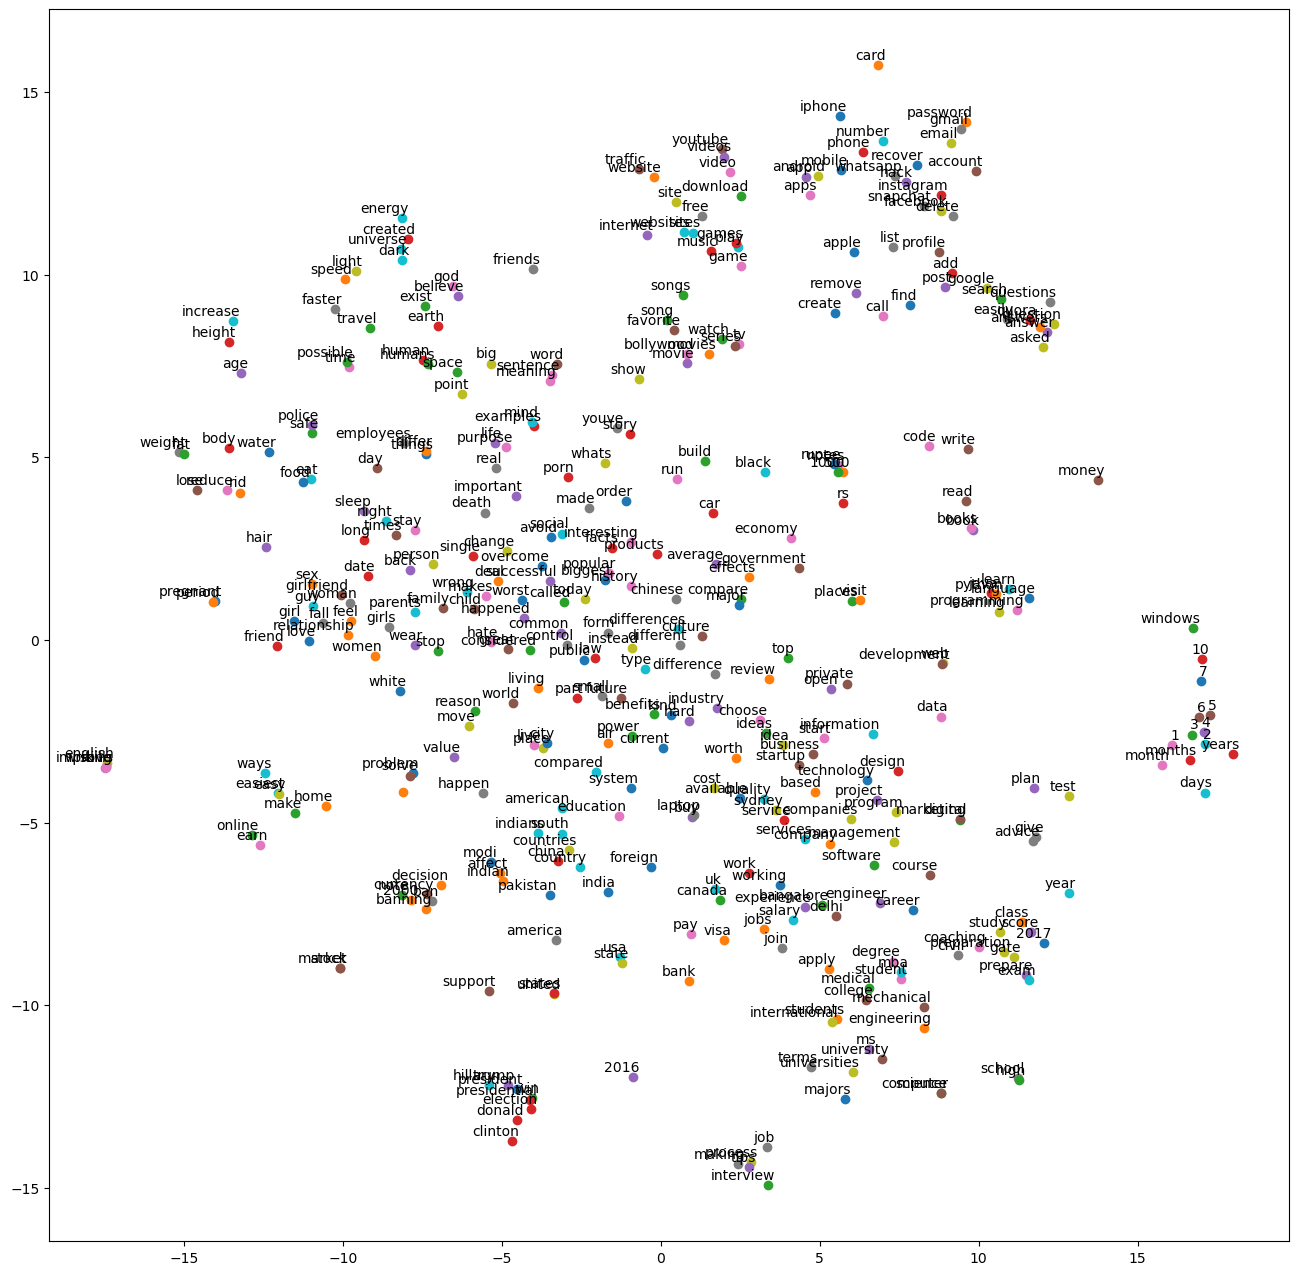

In [16]:
tsne_plot(model)